## Load necessary libraries

In [1]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline

from models import AutoEncoder, VAE
from dataset import FontsLoader

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Device:', device)

Device: cuda


### Load example data

In [3]:
dataset = FontsLoader._get_set()

## Load Model

In [4]:
net = AutoEncoder(
    latent_dim=512,
    in_channels=1,
    num_hiddens=256,
    num_res_hiddens=64,
    num_res_layers=4,
    out_channels=1,
).to(device)

net.load_state_dict(
    torch.load(open('./checkpoints/ae-512-224x224-loss-0.024.pth', 'rb'), map_location=device)
)
net.eval()

AutoEncoder(
  (encoder): ResEncoder(
    (conv_1): Conv2d(1, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (conv_2): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (conv_3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (res_stack): ResStack(
      (res_layers): ModuleList(
        (0): ResBlock(
          (residual): Sequential(
            (0): Conv2d(256, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU(inplace=True)
            (3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          )
        )
        (1): ResBlock(
          (residual): Sequential(
            (0): Conv2d(256, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): Bat

In [9]:
index = 100
image = dataset[index]['image'].unsqueeze(0).to(device)
z, recon = net(image)

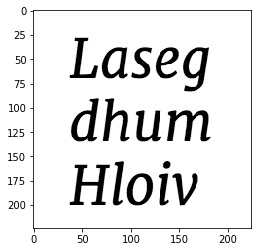

In [10]:
plt.imshow(dataset[index]['image'].squeeze(), cmap='gray');

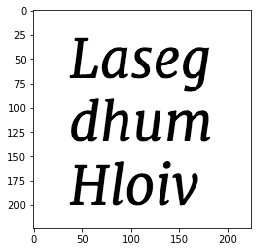

In [11]:
plt.imshow(recon[0].squeeze().cpu().detach().numpy(), cmap='gray');

In [12]:
net.loss_function(image, recon).item()

0.026501186192035675